In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import classification_report
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import numpy as np

In [2]:
file_path = "../dataset/schizo_symptons_cleaned_Z-Score.xlsx"  
df = pd.read_excel(file_path)
print(df.head())

        Age  Gender  Marital_Status   Fatigue   Slowing          Pain  \
0 -0.713529       0               2  0.672629 -1.304923 -4.321817e-01   
1  1.374827       1               1 -1.574194 -1.877365 -2.322596e-01   
2 -0.817946       0               1  0.513058 -1.082899 -1.929941e-16   
3  2.105752       0               3 -1.618939  0.281756 -1.718367e+00   
4  0.643903       0               3  1.464425 -0.053109  7.050443e-01   

    Hygiene  Movement  Schizophrenia  
0 -0.898941 -0.855956              0  
1  0.005156 -0.414047              3  
2 -0.670703 -0.680962              0  
3 -0.653659  1.082235              3  
4  0.801472  0.274285              1  


In [3]:
print(df.describe())

                Age       Gender  Marital_Status       Fatigue       Slowing  \
count  5.000000e+03  5000.000000     5000.000000  5.000000e+03  5.000000e+03   
mean   2.373213e-16     0.498000        1.483000 -1.136868e-17  1.506351e-16   
std    1.000100e+00     0.500046        1.130472  1.000100e+00  1.000100e+00   
min   -2.070960e+00     0.000000        0.000000 -2.074097e+00 -2.060259e+00   
25%   -8.179463e-01     0.000000        0.000000 -8.440921e-01 -8.350644e-01   
50%    1.739600e-02     0.000000        1.000000  0.000000e+00  3.848374e-16   
75%    8.527383e-01     1.000000        3.000000  8.391063e-01  8.126173e-01   
max    2.105752e+00     1.000000        3.000000  2.033754e+00  2.054212e+00   

               Pain       Hygiene      Movement  Schizophrenia  
count  5.000000e+03  5.000000e+03  5.000000e+03    5000.000000  
mean  -3.126388e-17 -3.154810e-16  2.124523e-16       0.766200  
std    1.000100e+00  1.000100e+00  1.000100e+00       1.150218  
min   -2.069950e+00

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5000 non-null   float64
 1   Gender          5000 non-null   int64  
 2   Marital_Status  5000 non-null   int64  
 3   Fatigue         5000 non-null   float64
 4   Slowing         5000 non-null   float64
 5   Pain            5000 non-null   float64
 6   Hygiene         5000 non-null   float64
 7   Movement        5000 non-null   float64
 8   Schizophrenia   5000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 351.7 KB
None


In [5]:
# Pisahkan fitur (X) dan label (Y)
df_X = df.drop(columns=['Schizophrenia'])  # semua fitur numerik
df_Y = df['Schizophrenia']  # target klasifikasi

In [6]:
# Konversi kembali menjadi DataFrame dengan kolom yang sesuai
column_label = df.drop(columns=['Schizophrenia']).columns  
df_X = pd.DataFrame(df_X, columns=column_label)

In [7]:
print(df_X.head())

        Age  Gender  Marital_Status   Fatigue   Slowing          Pain  \
0 -0.713529       0               2  0.672629 -1.304923 -4.321817e-01   
1  1.374827       1               1 -1.574194 -1.877365 -2.322596e-01   
2 -0.817946       0               1  0.513058 -1.082899 -1.929941e-16   
3  2.105752       0               3 -1.618939  0.281756 -1.718367e+00   
4  0.643903       0               3  1.464425 -0.053109  7.050443e-01   

    Hygiene  Movement  
0 -0.898941 -0.855956  
1  0.005156 -0.414047  
2 -0.670703 -0.680962  
3 -0.653659  1.082235  
4  0.801472  0.274285  


In [8]:
k = 6
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(df_X, df_Y)
knn_test = model_knn.predict(df_X)

In [9]:
print("\nClassification Report for full dataset:")
print(classification_report(df_Y, knn_test))


Classification Report for full dataset:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3077
           1       0.96      0.72      0.82       953
           2       0.90      0.42      0.58        45
           3       0.94      0.73      0.82       912
           4       0.00      0.00      0.00        13

    accuracy                           0.88      5000
   macro avg       0.73      0.57      0.63      5000
weighted avg       0.89      0.88      0.88      5000



C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

In [10]:
# K-fold Cross Validation
seed = 7
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
knn_acc = model_selection.cross_val_score(model_knn, df_X, df_Y, cv=kfold, scoring=scoring)

print("Akurasi per fold:")
print(", ".join([f"{acc:.4f}" for acc in knn_acc]))
print("\nKinerja rata-rata: {:.4f}".format(knn_acc.mean()))
print("Standar deviasi: {:.4f}".format(knn_acc.std()))

Akurasi per fold:
0.8320, 0.8520, 0.8360, 0.8460, 0.8220, 0.8640, 0.8380, 0.8300, 0.8420, 0.8400

Kinerja rata-rata: 0.8402
Standar deviasi: 0.0113


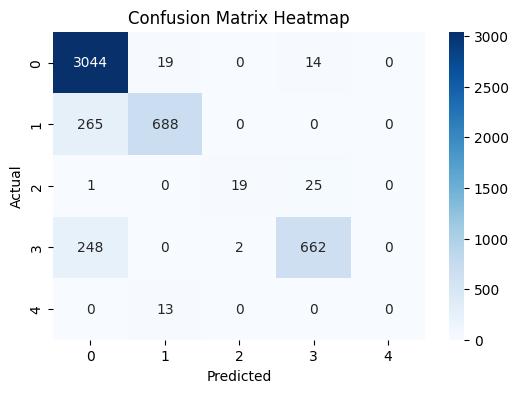

In [ ]:
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
cm = confusion_matrix(df_Y, knn_test)

# Heatmap confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()